In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_this = pd.read_csv("desktop/happy.csv")

data_this.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Acoording to data the happiest country is Switzerland.

In [3]:
data_this.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


By using describe method we can learn some statistical informations about data.

In [4]:
#columns of data
data_this.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
data_this.shape

(158, 12)

We have the shape of the data, 158 rows and 12 columns

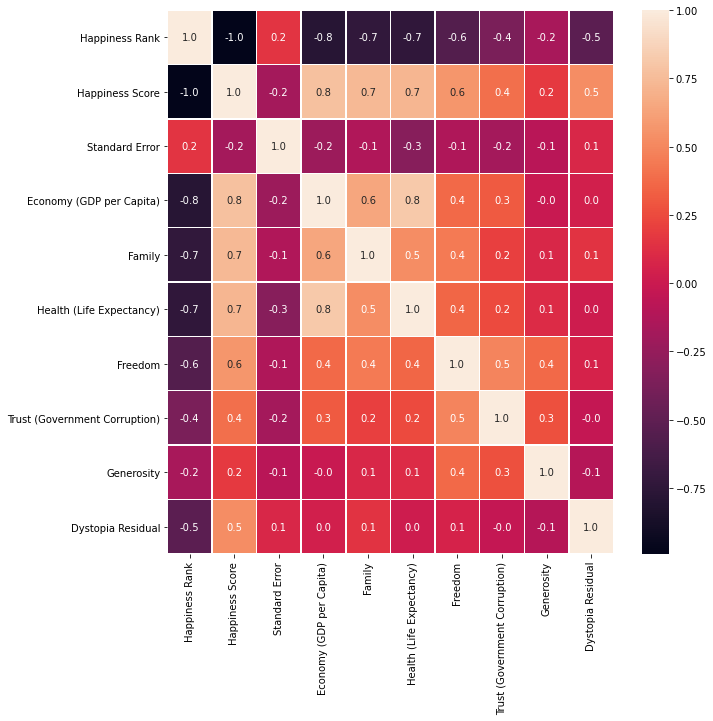

In [6]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_this.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

We still dont have a proper corelation between many of the variables.

<AxesSubplot:>

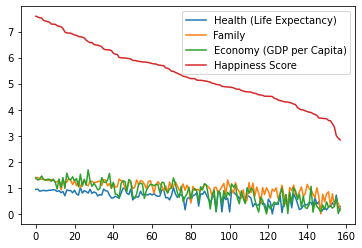

In [7]:
data_plot = data_this.loc[:,["Health (Life Expectancy)","Family", "Economy (GDP per Capita)","Happiness Score" ]]
data_plot.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

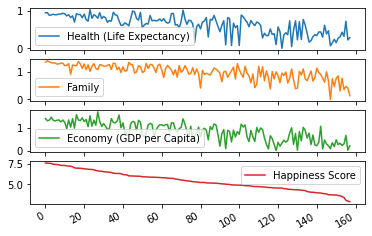

In [8]:
data_plot.plot(subplots = True)

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

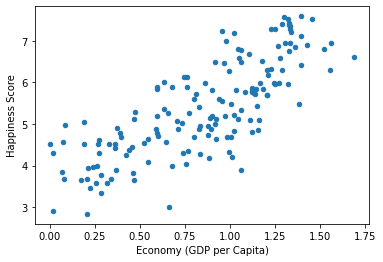

In [9]:
data_plot.plot(kind = "scatter", x = "Economy (GDP per Capita)", y = "Happiness Score")


We can see this positive relationship between happiness score and economy from scatterplot.

In [10]:
data_this.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Text(0.5, 1.0, 'Happiness Score Ratio by Regions')

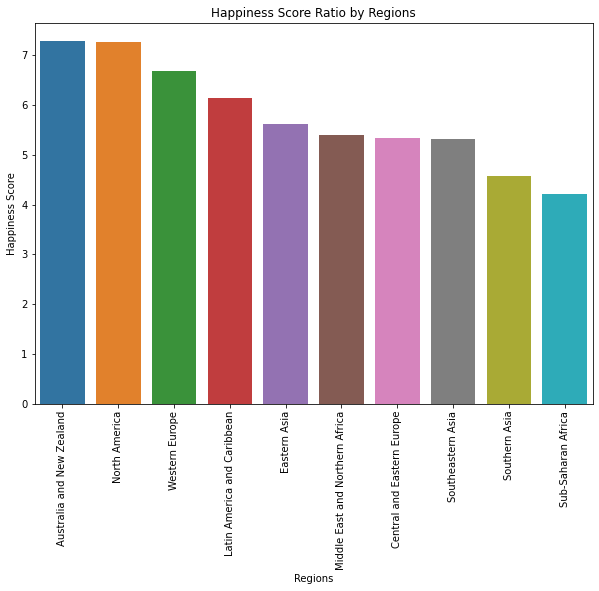

In [11]:
region_list = list(data_this.Region.unique())
region_happiness_score_ratio = []
for i in region_list:
    x = data_this[data_this.Region == i]
    region_happiness_score_rate = sum(x["Happiness Score"])/len(x)
    region_happiness_score_ratio.append(region_happiness_score_rate)
#I want to sort my new data 
data_bar = pd.DataFrame({'region_list':region_list, 'region_happiness_score_ratio':region_happiness_score_ratio})
new_index = (data_bar['region_happiness_score_ratio'].sort_values(ascending = False)).index.values
sorted_data = data_bar.reindex(new_index)

#visualisation
plt.figure(figsize=(10,7))
sns.barplot(x=sorted_data['region_list'], y=sorted_data['region_happiness_score_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Regions')
plt.ylabel('Happiness Score')
plt.title('Happiness Score Ratio by Regions')

    


Australia and New Zeland regions have highest happiness score ratio. 

Text(0.5, 1.0, 'Economy Ratio by Regions')

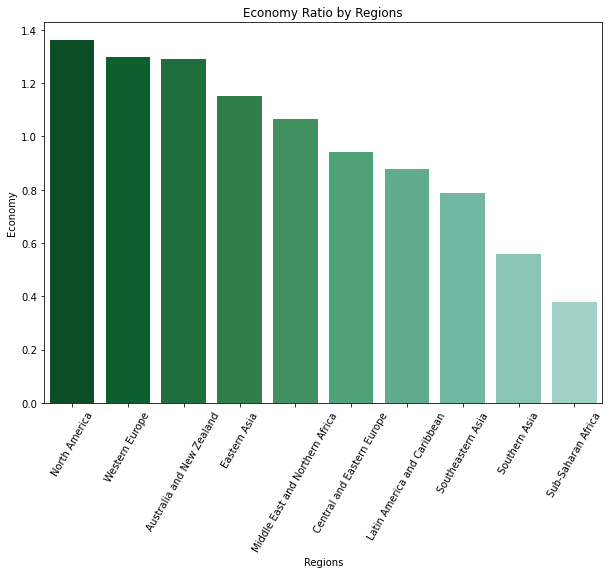

In [12]:
region_economy_ratio = []
for i in region_list:
    y = data_this[data_this.Region == i]
    region_economy_rate = sum(y['Economy (GDP per Capita)'])/len(y)
    region_economy_ratio.append(region_economy_rate)
    
data_bar2 = pd.DataFrame({'region_list':region_list,'region_economy_ratio':region_economy_ratio})
new_index2=(data_bar2['region_economy_ratio'].sort_values(ascending = False)).index.values
sorted_data2 = data_bar2.reindex(new_index2)

plt.figure(figsize=(10,7))
sns.barplot(x=sorted_data2['region_list'], y=sorted_data2['region_economy_ratio'], palette = sns.color_palette("BuGn_r",15) )
plt.xticks(rotation= 60)
plt.xlabel('Regions')
plt.ylabel('Economy')
plt.title('Economy Ratio by Regions')

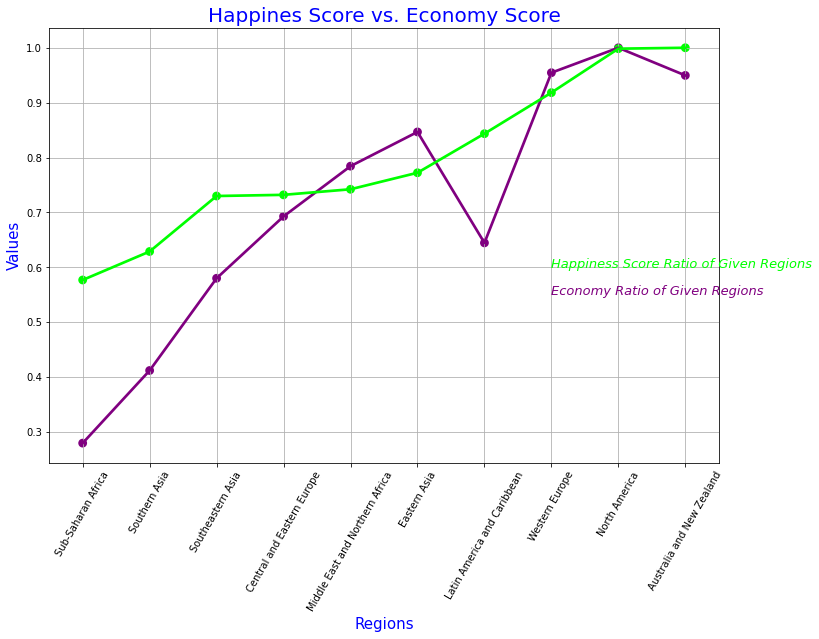

In [13]:
sorted_data.region_happiness_score_ratio = sorted_data.region_happiness_score_ratio/max(sorted_data.region_happiness_score_ratio)
sorted_data2.region_economy_ratio = sorted_data2.region_economy_ratio/max(sorted_data2.region_economy_ratio)
data = pd.concat([sorted_data,sorted_data2.region_economy_ratio],axis = 1)
data.sort_values("region_happiness_score_ratio",inplace = True)

f,ax1 = plt.subplots(figsize = (12,8))
sns.pointplot(x = "region_list",y = "region_economy_ratio",data = data,color = 'purple',alpha = 0.7)
sns.pointplot(x = "region_list",y = "region_happiness_score_ratio", data = data,color = 'lime',alpha = 0.7)
plt.text(7,0.6, "Happiness Score Ratio of Given Regions",color = 'lime',fontsize = 13,style = 'italic' )
plt.text(7,0.55, "Economy Ratio of Given Regions",color = 'purple',fontsize = 13,style = 'italic')
plt.xlabel('Regions', fontsize = 15, color = 'blue')
plt.ylabel('Values', fontsize = 15, color ='blue')
plt.xticks(rotation = 60)
plt.title('Happines Score vs. Economy Score', fontsize = 20, color = 'blue')
plt.grid()




Visualising the regions

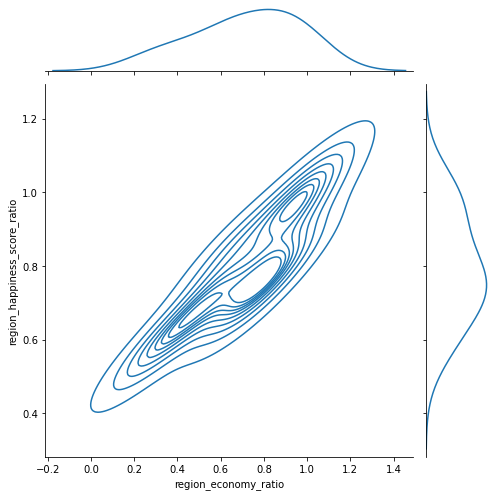

In [14]:
g = sns.jointplot(data.region_economy_ratio, data.region_happiness_score_ratio, kind = "kde", height = 7)
plt.show()

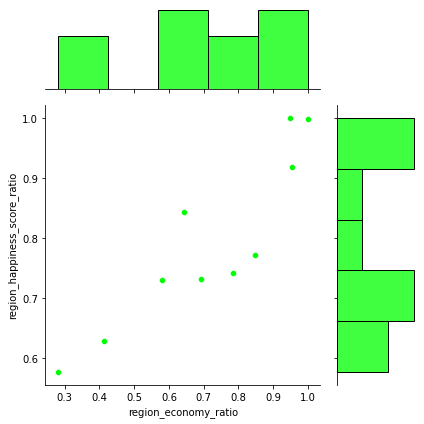

In [15]:
g = (sns.jointplot('region_economy_ratio', 'region_happiness_score_ratio',data = data, color = 'lime', ratio = 3))

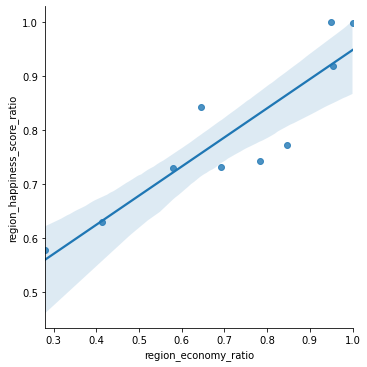

In [16]:
sns.lmplot('region_economy_ratio', 'region_happiness_score_ratio',data = data)
plt.show()

This lmplot shows us the relationship between hapiness score and economy.

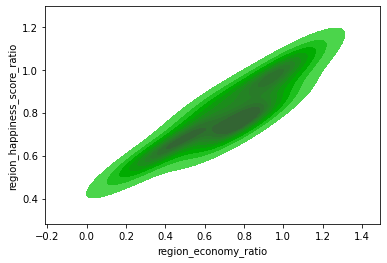

In [17]:
sns.kdeplot(data.region_economy_ratio, data.region_happiness_score_ratio, shade = True, cut = 3, color ='green')
plt.show()

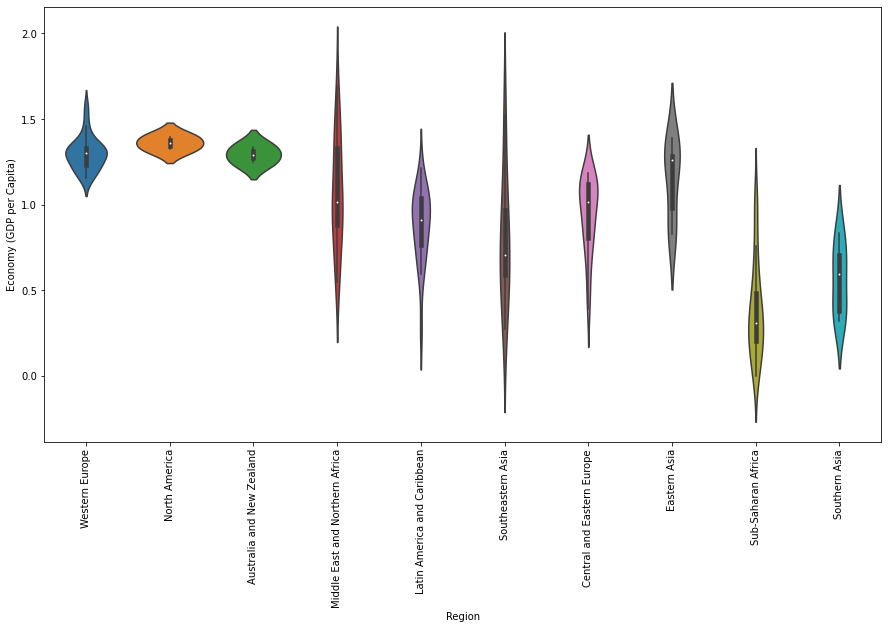

In [18]:
f,ax1 = plt.subplots(figsize = (15,8))
sns.violinplot(x = data_this.Region, y = data_this['Economy (GDP per Capita)'])
plt.xticks(rotation = 90)
plt.show()

This violinplot shows us the distribution of countries in each region by economy

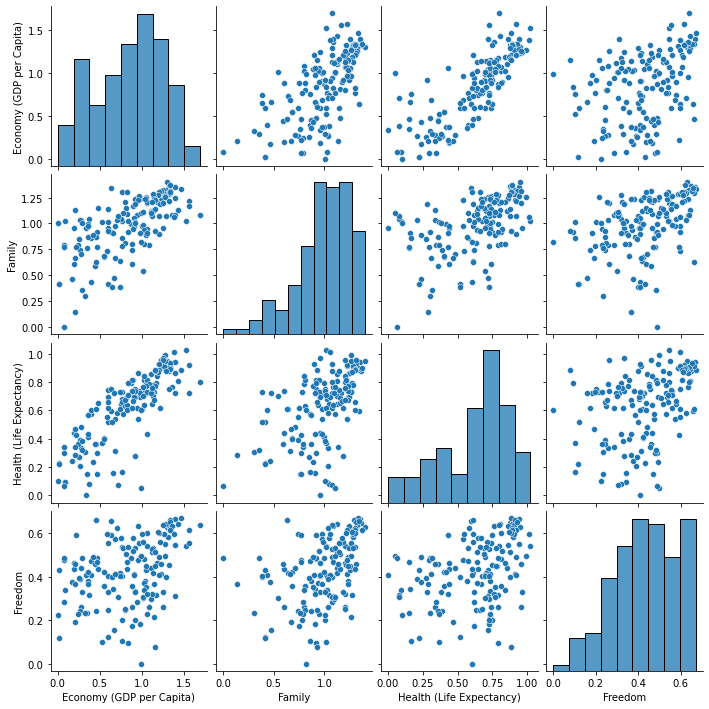

In [19]:
sns.pairplot(data_this.iloc[:,[0,5,6,7,8]])
plt.show()

Here I compound World Happiness Report and World Capitals Gps datas

In [20]:
import sklearn

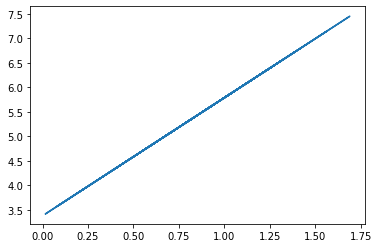

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
x = data_this['Economy (GDP per Capita)'].values.reshape(-1,1)
y = data_this['Happiness Score'].values.reshape(-1,1)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state=0)

lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)
plt.plot(x_test,y_pred)



Performing liner regression, we have a proper corelation now.

In [22]:
b0 = lin_reg.intercept_
b1 = lin_reg.coef_
print('equation of the line is: ',b1,'x +',b0)

equation of the line is:  [[2.4060534]] x + [3.38107425]


In [23]:
xtest = pd.DataFrame(x_test)
ypred = pd.DataFrame(y_pred)
prediction = pd.concat([xtest,ypred],axis=1)
prediction.columns = ['xtest','ypred']
prediction.sort_values(by='xtest', ascending=False, axis = 0, inplace = True)
prediction.head()




,xtest,ypred
40,1.69042,7.448315
32,1.56391,7.143925
27,1.42727,6.815162
47,1.38604,6.715961
0,1.33171,6.585240


In [24]:
xtest = pd.DataFrame(x_test)
ytest = pd.DataFrame(y_test)
test = pd.concat([xtest,ytest],axis=1)
test.columns = ['xtest','ytest']
test.sort_values(by='xtest', ascending=False, axis = 0, inplace = True)
test.head()

,xtest,ytest
40,1.69042,6.611
32,1.56391,6.946
27,1.42727,6.901
47,1.38604,5.474
0,1.33171,7.364


In [25]:
data_this.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [26]:
#Multiple linear regression
x1 = data_this[['Economy (GDP per Capita)','Health (Life Expectancy)','Family','Freedom']].values
y1 = data_this['Happiness Score'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.33, random_state=0)
mlp = LinearRegression()
mlp.fit(x1_train,y1_train)
y1_predict = pd.DataFrame(mlp.predict(x1_test))
y1_test = pd.DataFrame(y1_test)



In [27]:
#comparing of test and prediction
comp  = pd.concat([y1_predict,y1_test],axis=1)
comp.columns = ['y1_predict','y1_test']
comp.sort_values(by='y1_test', ascending=False, axis = 0, inplace = True)
comp.sample(10)

,y1_predict,y1_test
44,6.799956,6.937
30,4.993446,5.889
51,5.998269,6.003
28,4.852261,3.819
7,3.888898,3.956
35,6.051535,6.810
0,6.966098,7.364
29,4.092785,4.694
13,6.039364,5.770
33,3.309741,4.292


We have our final coparision. Our predicted result is very close to actual value.
